## ⏹ Importing the required libraries:

In [1]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt  
import seaborn as sns  

## ⏹ Loading data from CSV files:

In [2]:
intakes = pd.read_csv("intakes.csv")

outcomes = pd.read_csv("outcomes.csv")

## ⏹ Exploring the data and commenting on the results:

In [3]:
print("Shape is:", intakes.shape, "\n")
print(intakes.info())

Shape is: (167556, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167556 non-null  object
 1   Name              119338 non-null  object
 2   DateTime          167556 non-null  object
 3   MonthYear         167556 non-null  object
 4   Found Location    167556 non-null  object
 5   Intake Type       167556 non-null  object
 6   Intake Condition  167556 non-null  object
 7   Animal Type       167556 non-null  object
 8   Sex upon Intake   167554 non-null  object
 9   Age upon Intake   167555 non-null  object
 10  Breed             167556 non-null  object
 11  Color             167556 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB
None


In [4]:
print("Shape is:", outcomes.shape, "\n")
print(outcomes.info())

Shape is: (167559, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167559 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167559 non-null  object
 1   Name              119476 non-null  object
 2   DateTime          167559 non-null  object
 3   MonthYear         167559 non-null  object
 4   Date of Birth     167559 non-null  object
 5   Outcome Type      167515 non-null  object
 6   Outcome Subtype   76968 non-null   object
 7   Animal Type       167559 non-null  object
 8   Sex upon Outcome  167556 non-null  object
 9   Age upon Outcome  167512 non-null  object
 10  Breed             167559 non-null  object
 11  Color             167559 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB
None


In [5]:
# Check for missing values
print(intakes.isnull().sum(), "\n")
print(outcomes.isnull().sum())

Animal ID               0
Name                48218
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         2
Age upon Intake         1
Breed                   0
Color                   0
dtype: int64 

Animal ID               0
Name                48083
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           44
Outcome Subtype     90591
Animal Type             0
Sex upon Outcome        3
Age upon Outcome       47
Breed                   0
Color                   0
dtype: int64


#### intakes contains 167,556 rows and 12 columns, outcomes contains 150,558 rows and 13 columns.
#### Important missing values in the Name, Sex upon Outcome/Intake, and Age upon Outcome/Intake columns require further processing.
#### Most columns are object type, some of them should be converted to categories to optimize memory.
#### Handle missing values and convert data types to improve operability of the dataset.

##
## ⏹ Data cleaning and transformation:
#
#### Replace the lines with suspicious values with Nan:

In [6]:
display(intakes.head())
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [7]:
# Clean the "Name" columns in both datasets by removing any non-alphabetical characters
intakes["Name"] = intakes["Name"].replace(r"[^a-zA-z]", "", regex=True)
outcomes["Name"] = outcomes["Name"].replace(r"[^a-zA-z]", "", regex=True)

In [8]:
# Checking the unique values in the columns to detect any invalid entries
display(set(outcomes["Sex upon Outcome"].dropna().unique()).union(set(intakes["Sex upon Intake"].dropna().unique())))
display(set(outcomes["Animal Type"].dropna().unique()).union(set(intakes["Animal Type"].dropna().unique())))

print(intakes["Intake Type"].unique())

{'Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown'}

{'Bird', 'Cat', 'Dog', 'Livestock', 'Other'}

['Stray' 'Public Assist' 'Owner Surrender' 'Abandoned' 'Wildlife'
 'Euthanasia Request']


In [9]:
print(intakes["Name"].value_counts().get("", 0))
print(outcomes["Name"].value_counts().get("", 0))

290
290


In [10]:
intakes.replace(["Unknown", ""], np.nan, inplace=True)
outcomes.replace(["Unknown", ""], np.nan, inplace=True)

In [11]:
print(intakes.isnull().sum(), "\n")
print(outcomes.isnull().sum())

Animal ID               0
Name                48582
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition       25
Animal Type             0
Sex upon Intake     13038
Age upon Intake         1
Breed                   3
Color                   1
dtype: int64 

Animal ID               0
Name                48446
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           44
Outcome Subtype     90591
Animal Type             0
Sex upon Outcome    13004
Age upon Outcome       47
Breed                   3
Color                   1
dtype: int64


In [12]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,JohnnyRingo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby


#### In the Name columns, we removed all non-alphabetical characters using regular expressions. This helps to get rid of unnecessary characters and make the data cleaner for analysis.

#### We checked the unique values in the Sex upon Outcome/Intake and Animal Type columns to identify invalid data, such as "Unknown", which were replaced with NaN. This simplifies further data processing and statistical analysis.

#### All values that were reported as "Unknown" or empty strings were replaced with NaN. This will help in further processing of missing data.

#### After cleaning the rows, 290 records in both datasets were left without a name. This should be taken into account when working with this information (e.g., these rows can be removed or left unchanged for analysis).

##
### ⏺ Convert categorical features to the category type:

In [13]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167556 non-null  object
 1   Name              118974 non-null  object
 2   DateTime          167556 non-null  object
 3   MonthYear         167556 non-null  object
 4   Found Location    167556 non-null  object
 5   Intake Type       167556 non-null  object
 6   Intake Condition  167531 non-null  object
 7   Animal Type       167556 non-null  object
 8   Sex upon Intake   154518 non-null  object
 9   Age upon Intake   167555 non-null  object
 10  Breed             167553 non-null  object
 11  Color             167555 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB


In [14]:
# Converting the following columns to "category" type for intakes
intakes["Sex upon Intake"] = intakes["Sex upon Intake"].astype("category")
intakes["Intake Condition"] = intakes["Intake Condition"].astype("category")
intakes["Intake Type"] = intakes["Intake Type"].astype("category")
intakes["Animal Type"] = intakes["Animal Type"].astype("category")

In [15]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167559 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167559 non-null  object
 1   Name              119113 non-null  object
 2   DateTime          167559 non-null  object
 3   MonthYear         167559 non-null  object
 4   Date of Birth     167559 non-null  object
 5   Outcome Type      167515 non-null  object
 6   Outcome Subtype   76968 non-null   object
 7   Animal Type       167559 non-null  object
 8   Sex upon Outcome  154555 non-null  object
 9   Age upon Outcome  167512 non-null  object
 10  Breed             167556 non-null  object
 11  Color             167558 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB


In [16]:
# Converting the following columns to "category" type for outcomes
outcomes["Sex upon Outcome"] = outcomes["Sex upon Outcome"].astype("category")
outcomes["Outcome Subtype"] = outcomes["Outcome Subtype"].astype("category")
outcomes["Outcome Type"] = outcomes["Outcome Type"].astype("category")
outcomes["Animal Type"] = outcomes["Animal Type"].astype("category")

##
### ⏺ Convert the "Age upon Intake" and "Age upon Outcome" columns to number format:

In [17]:
intakes["Age upon Intake"].unique()

array(['2 years', '8 years', '11 months', '4 weeks', '4 years', '6 years',
       '6 months', '5 months', '1 month', '14 years', '2 weeks', '1 week',
       '2 months', '18 years', '9 years', '4 months', '1 day', '1 year',
       '3 years', '4 days', '5 years', '15 years', '8 months', '6 days',
       '7 years', '3 months', '3 weeks', '12 years', '9 months',
       '10 years', '10 months', '7 months', '0 years', '1 weeks',
       '5 days', '17 years', '2 days', '11 years', '3 days', '13 years',
       '5 weeks', '16 years', '19 years', '20 years', '-1 years',
       '-3 years', '22 years', '-4 years', '28 years', nan, '23 years',
       '30 years', '-2 years', '21 years', '25 years', '24 years'],
      dtype=object)

In [18]:
# Function to convert age strings to number of days
def convert_age_to_days(age_str):
    if pd.isnull(age_str):
        return np.nan
    
    try:
        number, unit = age_str.split()[0], age_str.split()[1]
        number = int(number)
        
        if number < 0:
            return np.nan
        
        if unit == "years" or unit == "year":
            number = number * 365
        elif unit == "months" or unit == "month":
            number = number * 30
        elif unit == "weeks" or unit == "week":
            number = number * 7
        
        return number    
        
    except Exception as e:
        return np.nan

In [19]:
intakes["Age upon Intake"] = intakes["Age upon Intake"].apply(convert_age_to_days)
outcomes["Age upon Outcome"] = outcomes["Age upon Outcome"].apply(convert_age_to_days)

In [20]:
print(intakes[["Age upon Intake"]].head(), "\n")
print(outcomes[["Age upon Outcome"]].head())

   Age upon Intake
0            730.0
1           2920.0
2            330.0
3             28.0
4            730.0 

   Age upon Outcome
0              90.0
1             730.0
2             365.0
3             365.0
4             120.0


#### Animal ages have been successfully converted to days, which standardizes the data and simplifies further analysis.

##
### ⏺ Convert DateTime column to datetime64 format.

In [21]:
intakes["DateTime"] = pd.to_datetime(intakes["DateTime"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")
outcomes["DateTime"] = pd.to_datetime(outcomes["DateTime"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

print(intakes["DateTime"].head(), "\n")
print(outcomes["DateTime"].head())

0   2019-01-03 16:19:00
1   2015-07-05 12:59:00
2   2016-04-14 18:43:00
3   2013-10-21 07:59:00
4   2022-05-12 00:23:00
Name: DateTime, dtype: datetime64[ns] 

0   2023-07-01 18:12:00
1   2019-05-08 18:20:00
2   2018-07-18 16:02:00
3   2020-08-16 11:38:00
4   2016-02-13 17:59:00
Name: DateTime, dtype: datetime64[ns]


In [22]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         167556 non-null  object        
 1   Name              118974 non-null  object        
 2   DateTime          167556 non-null  datetime64[ns]
 3   MonthYear         167556 non-null  object        
 4   Found Location    167556 non-null  object        
 5   Intake Type       167556 non-null  category      
 6   Intake Condition  167531 non-null  category      
 7   Animal Type       167556 non-null  category      
 8   Sex upon Intake   154518 non-null  category      
 9   Age upon Intake   167546 non-null  float64       
 10  Breed             167553 non-null  object        
 11  Color             167555 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(1), object(6)
memory usage: 10.9+ MB


In [23]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,Brock,2019-01-03 16:19:00,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,730.0,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,2920.0,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,330.0,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21 07:59:00,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,28.0,Domestic Shorthair Mix,Calico
4,A857105,JohnnyRingo,2022-05-12 00:23:00,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,730.0,Domestic Shorthair,Orange Tabby


In [24]:
print(intakes.duplicated().sum())

32


In [25]:
intakes = intakes.drop_duplicates()

#### Columns such as "Sex upon Intake" and "Intake Condition" have been converted to the category type to save memory and improve performance.

#### "Age upon Intake" and "Age upon Outcome" columns have been converted to days numeric format to standardize age data.

#### "DateTime" column has been converted to datetime64 type to make it easier to work with dates and times.

#### 32 duplicates have been removed to improve data quality.

##
## ⏹ Descriptive statistics
#
### ⏺ Describe the "Age upon Intake" 

In [26]:
age_stat_in = intakes["Age upon Intake"].describe()
missing_age_in = intakes["Age upon Intake"].isnull().sum()

print("Descriptive statistics for 'Age upon Intake' (in days):")
print(age_stat_in, "\n")
print(f"Missing values: {missing_age_in}")

Descriptive statistics for 'Age upon Intake' (in days):
count    167514.000000
mean        710.069803
std        1021.500494
min           0.000000
25%          60.000000
50%         365.000000
75%         730.000000
max       10950.000000
Name: Age upon Intake, dtype: float64 

Missing values: 10


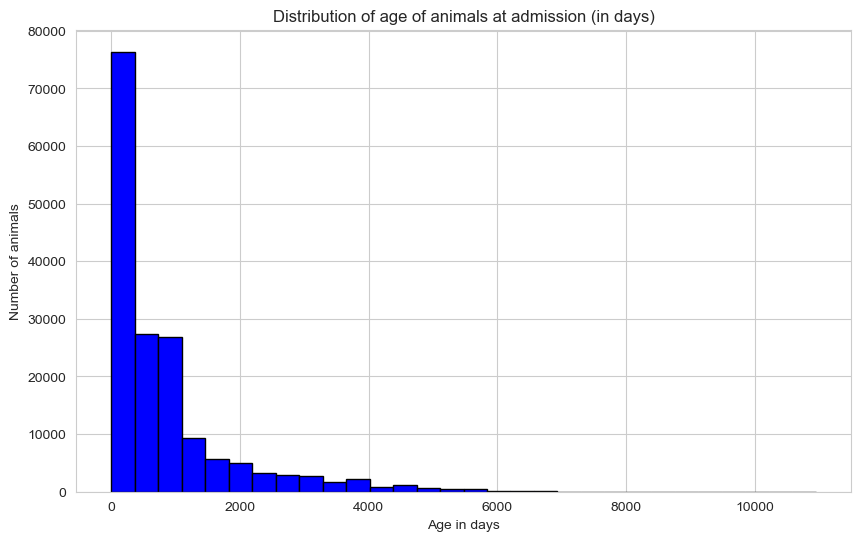

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(intakes["Age upon Intake"].dropna(), bins=30, color="blue", edgecolor="black")
plt.title("Distribution of age of animals at admission (in days)")
plt.xlabel("Age in days")
plt.ylabel("Number of animals")
plt.show()

#### The average age of animals is approximately 710 days (approximately 2 years), which means that most animals coming to the shelter are relatively young.

#### The median age is 365 days (approximately 1 year). This means that half of all animals coming to the shelter are under one year old.

#### The histogram shows a sharply decreasing number of animals coming in as age increases. Most animals come in under 2 years of age, with older animals (over 5 years) coming in less frequently.

#### The oldest animal in the dataset was 10,950 days old, which is about 30 years old, which is quite unusual for shelter animals.

#### There are 10 missing values in the age column that require additional analysis to handle.

##
### ⏺ Describe the "DateTime" features

In [28]:
data_intakes = pd.DataFrame()

data_intakes["Year"] = intakes["DateTime"].dt.year
data_intakes["Month"] = intakes["DateTime"].dt.month
data_intakes["Weekday"] = intakes["DateTime"].dt.weekday

data_intakes.head()

year_statistics = data_intakes["Year"].value_counts().sort_index()
month_statistics = data_intakes["Month"].value_counts().sort_index()
weekday_statistics = data_intakes["Weekday"].value_counts().sort_index()

print("Distribution of receipts by year:")
print(year_statistics)
print("\nDistribution of receipts by month:")
print(month_statistics)
print("\nDistribution of receipts by days of the week:")
print(weekday_statistics)

Distribution of receipts by year:
Year
2013     4182
2014    18654
2015    18709
2016    17673
2017    17559
2018    16975
2019    19726
2020     9585
2021    12040
2022    11891
2023    11223
2024     9307
Name: count, dtype: int64

Distribution of receipts by month:
Month
1     11616
2     10746
3     12851
4     13680
5     17604
6     16846
7     15360
8     14892
9     14720
10    15054
11    12590
12    11565
Name: count, dtype: int64

Distribution of receipts by days of the week:
Weekday
0    26443
1    26013
2    25686
3    24601
4    25065
5    21530
6    18186
Name: count, dtype: int64


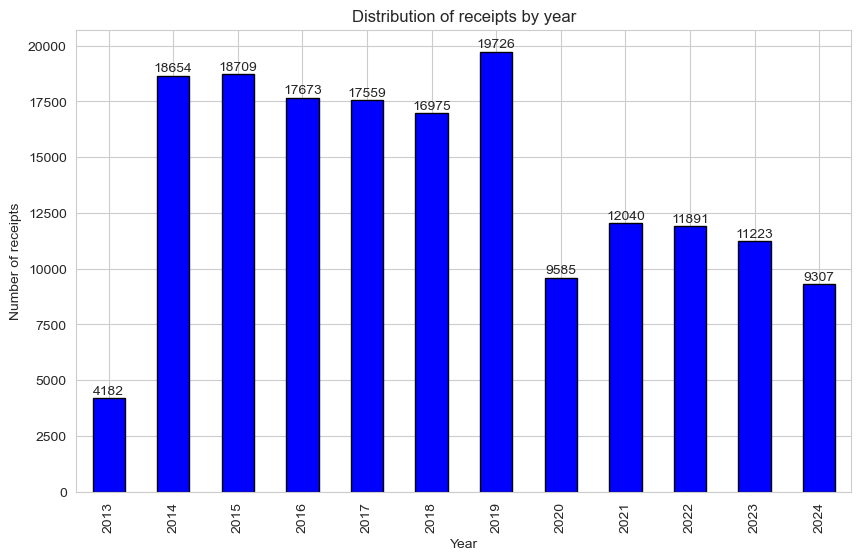

In [29]:
plt.figure(figsize=(10,6))
ax = year_statistics.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Distribution of receipts by year")
plt.xlabel("Year")
plt.ylabel("Number of receipts")

for index, value in enumerate(year_statistics):
    ax.text(index, value + 50, f"{value}", ha="center", va="bottom")

plt.show()


#### The graph shows that the number of animal arrivals to the shelter fluctuates from year to year. The peak in arrivals was most noticeable in 2019, followed by a sharp decline in 2020, likely related to the COVID-19 pandemic. In recent years, the number of arrivals has stabilized, although not reaching the levels of previous years.

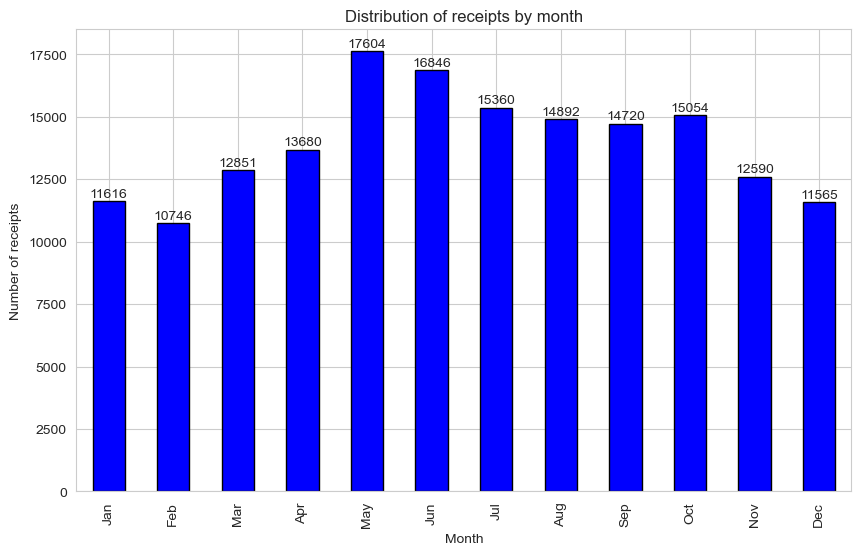

In [30]:
fig_month, ax = plt.subplots(figsize=(10, 6))
month_statistics.plot(kind="bar", color="blue", edgecolor="black", ax=ax)

ax.set_title("Distribution of receipts by month")
ax.set_xlabel("Month")
ax.set_ylabel("Number of receipts")
ax.set_xticks(range(12))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

for index, value in enumerate(month_statistics):
    ax.text(index, value + 50, f"{value}", ha="center", va="bottom")

plt.show()

#### This graph shows that the highest number of admissions occurs during the spring and summer (April - July), with a peak in May. This may be due to various factors, such as the breeding season or changes in pet housing conditions. There are fewer admissions during the winter months.

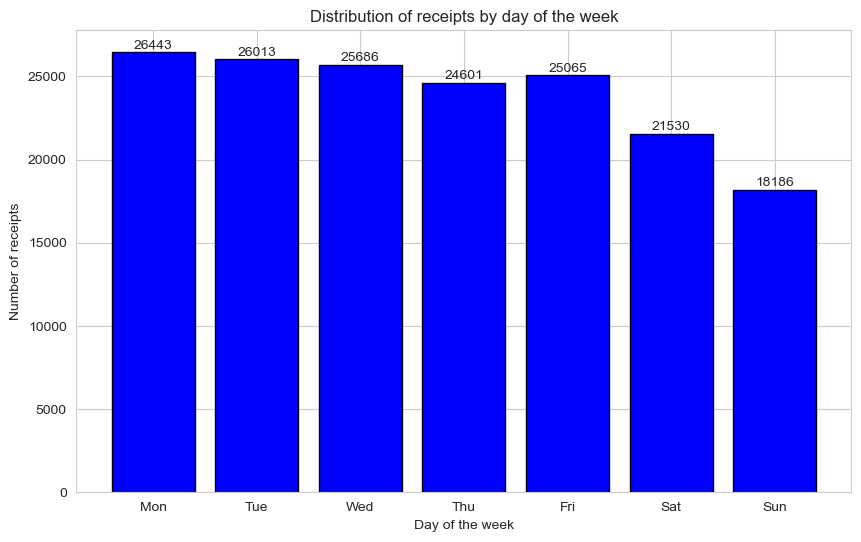

In [31]:
days_of_week = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
weekday_statistics.index = weekday_statistics.index.map(lambda x: days_of_week[x])

plt.figure(figsize=(10, 6))
bars = plt.bar(weekday_statistics.index, weekday_statistics.values, color="blue", edgecolor="black")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f"{int(height)}", ha="center", va="bottom")

plt.title("Distribution of receipts by day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Number of receipts")
plt.show()

#### This graph shows the distribution of admissions by day of the week. The highest number of admissions occurs at the beginning of the week (Monday and Tuesday), and the lowest numbers occur on weekends, especially Sunday. This may be due to the shelter"s work schedule or other external factors.

##
### ⏺ Lets choose three columns and describe them.
##
#### Description of Intake Type:

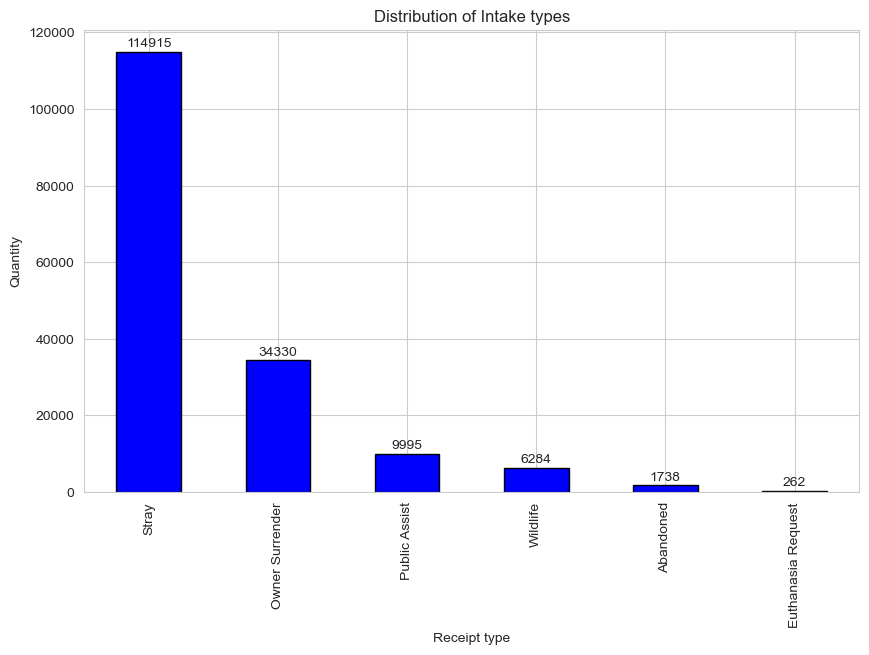


Frequency for 'Enter Type':
Intake Type
Stray                 114915
Owner Surrender        34330
Public Assist           9995
Wildlife                6284
Abandoned               1738
Euthanasia Request       262
Name: count, dtype: int64


In [32]:
intake_type_counts = intakes["Intake Type"].value_counts()
plt.figure(figsize=(10, 6))
ax = intake_type_counts.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Distribution of Intake types")
plt.xlabel("Receipt type")
plt.ylabel("Quantity")

for index, value in enumerate(intake_type_counts):
    ax.text(index, value + 500, str(value), ha="center", va="bottom")

plt.show()
print ("\nFrequency for 'Enter Type':")
print(intake_type_counts)

#### This graph shows the distribution of admissions by type. The majority of animals come in as strays (114,915), followed by owner surrenders (34,330). Public assistance accounts for a smaller number (9,995), while wildlife admissions and abandoned animals are less frequent (6,284 and 1,738, respectively). Euthanasia requests are rare, with only 262 cases. This distribution suggests that stray animals are the most common type of admission, possibly reflecting the shelter"s community role in rescuing homeless animals.

##
#### Description of Intake Condition:

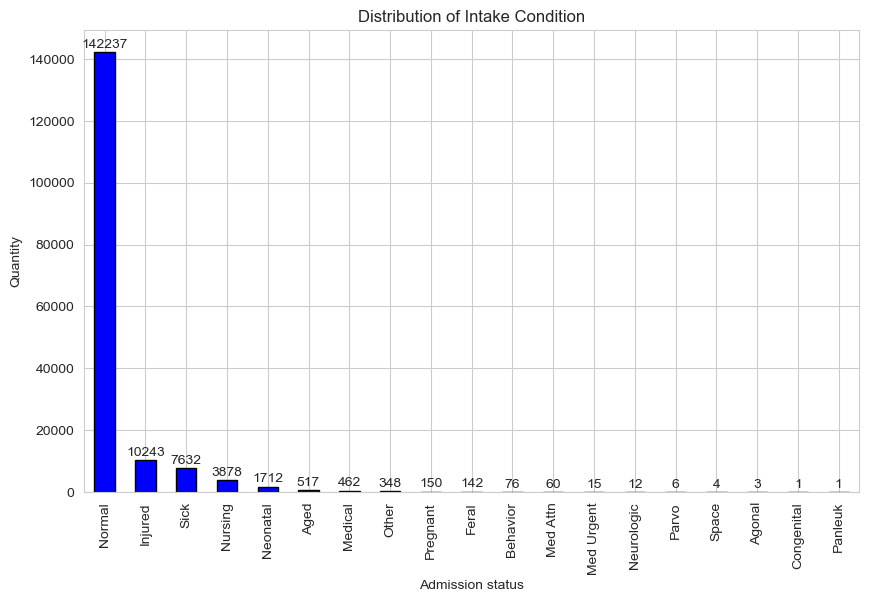


Happiness for 'Enter Condition':
Intake Condition
Normal        142237
Injured        10243
Sick            7632
Nursing         3878
Neonatal        1712
Aged             517
Medical          462
Other            348
Pregnant         150
Feral            142
Behavior          76
Med Attn          60
Med Urgent        15
Neurologic        12
Parvo              6
Space              4
Agonal             3
Congenital         1
Panleuk            1
Name: count, dtype: int64


In [33]:
intake_condition_counts = intakes["Intake Condition"].value_counts()

plt.figure(figsize=(10, 6))
ax = intake_condition_counts.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Distribution of Intake Condition")
plt.xlabel("Admission status")
plt.ylabel("Quantity")

for index, value in enumerate(intake_condition_counts):
    ax.text(index, value + 500, str(value), ha="center", va="bottom")

plt.show()

print ("\nHappiness for 'Enter Condition':")
print(intake_condition_counts)

#### This graph shows the distribution of intake conditions for animals entering the shelter. Most animals are admitted in a normal condition (142,237), followed by those who are injured (10,243) or sick (7,632). Other specific conditions, such as nursing (3,878) and neonatal (1,712), are less common. Rare conditions include medical emergencies like “Med Urgent” (15), severe neurological issues (12), and specific illnesses like parvo (6). This distribution indicates that while the majority of animals arrive in good health, a significant number require medical attention, underscoring the shelter"s role in caring for vulnerable animals.

##
#### Description of Sex upon Intake

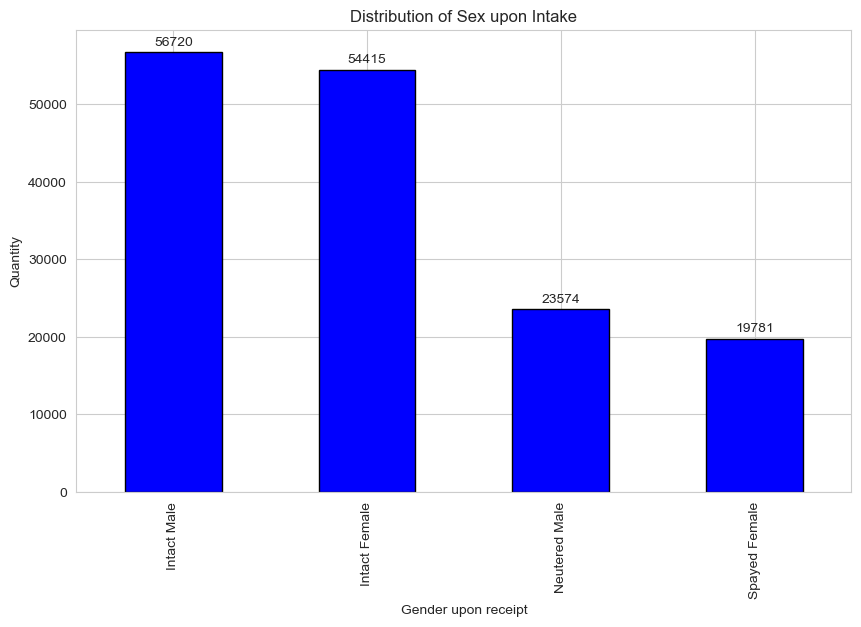


 Frequency for 'Sex upon Intake':
Sex upon Intake
Intact Male      56720
Intact Female    54415
Neutered Male    23574
Spayed Female    19781
Name: count, dtype: int64
Missing values: 13034


In [34]:
sex_counts = intakes["Sex upon Intake"].value_counts()
missing_sex = intakes["Sex upon Intake"].isnull().sum()

plt.figure(figsize=(10, 6))
ax = sex_counts.plot(kind="bar", color="blue", edgecolor="black")
plt.title ("Distribution of Sex upon Intake")
plt.xlabel ("Gender upon receipt")
plt.ylabel ("Quantity")

for index, value in enumerate(sex_counts):
    ax.text(index, value + 500, str(value), ha="center", va="bottom")

plt.show()

print ("\n Frequency for 'Sex upon Intake':")
print(sex_counts)
print (f"Missing values: {missing_sex}")

#### This graph shows the distribution of animal sexes and sterilization status upon intake. The most common categories are "Intact Male" (56,720) and "Intact Female" (54,415), indicating that a large proportion of animals are unsterilized when they arrive. Neutered males (23,574) and spayed females (19,781) are less common. There are 13,034 missing values, which might impact the accuracy of some analyses and could require further investigation or imputation. This distribution highlights the need for sterilization resources in the shelter.

## 
### ⏺ Analyzing the Relationship Between Animal Age and Shelter Outcome

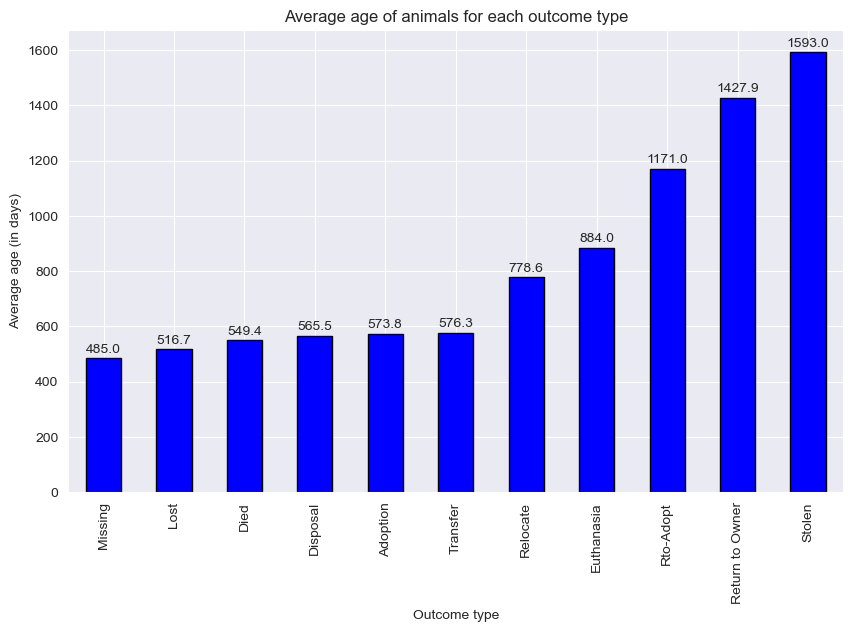

In [35]:
filtered_data = outcomes[["Age upon Outcome", "Outcome Type"]].dropna()
mean_age_by_outcome = filtered_data.groupby("Outcome Type", observed=True)["Age upon Outcome"].mean().sort_values()

plt.figure(figsize=(10,6))
ax = mean_age_by_outcome.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Average age of animals for each outcome type")
plt.xlabel("Outcome type")
plt.ylabel("Average age (in days)")

for index, value in enumerate(mean_age_by_outcome):
    ax.text(index, value + 10, f"{value:.1f}", ha="center", va="bottom")

plt.show()

#### The chart shows that an animal"s age affects its outcome in a shelter. Younger animals are more likely to be adopted (around 500 days old), while older animals (average age around 900-1500 days) are more likely to end up in the euthanasia, return to owners, or theft categories.

##
### ⏺ Does an animal"s "Outcome Type" depend on its "Intake Type"?

In [36]:
intakes_unique = intakes.drop_duplicates(subset=["Animal ID"])
outcomes_unique = outcomes.drop_duplicates(subset=["Animal ID"])

merged_data = pd.merge(intakes_unique[["Animal ID", "Intake Type"]], outcomes_unique[["Animal ID", "Outcome Type"]], on = "Animal ID", how = "inner")
merged_data = merged_data[["Intake Type", "Outcome Type"]]

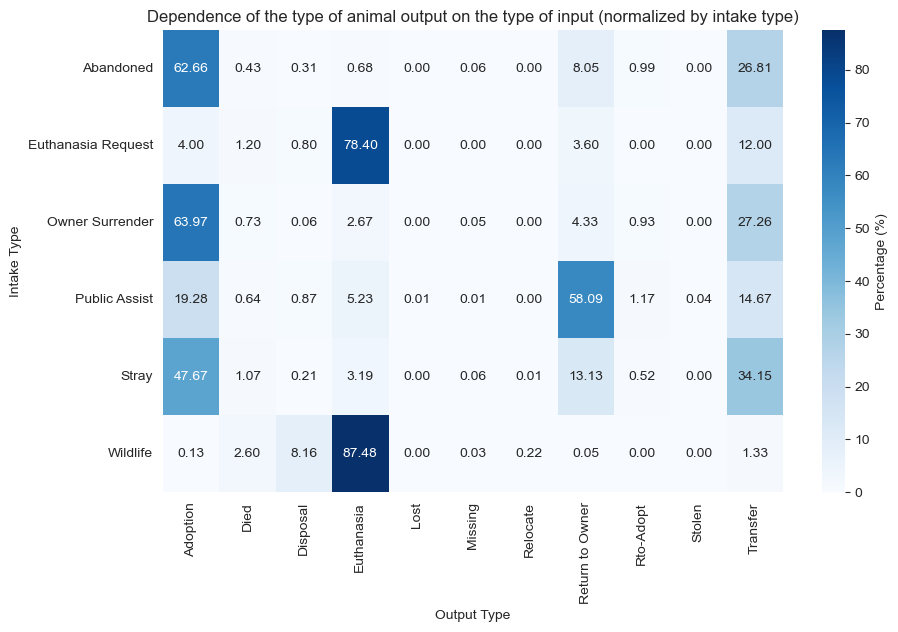

In [37]:
crosstab_normalized = pd.crosstab(merged_data["Intake Type"], merged_data["Outcome Type"], normalize="index") * 100

plt.figure(figsize=(10,6))
heatmap = sns.heatmap(crosstab_normalized, annot=True, cmap="Blues", fmt=".2f")

plt.title("Dependence of the type of animal output on the type of input (normalized by intake type)")
plt.xlabel("Output Type")
plt.ylabel("Intake Type")
colorbar = heatmap.collections[0].colorbar
colorbar.set_label("Percentage (%)")
plt.show()

#### It is evident that the majority of abandoned animals (Abandoned) are adopted (62.66%). Animals received by euthanasia request (Euthanasia Request) are euthanized in 78.4% of cases. Animals surrendered by owners (Owner Surrender) are adopted in 63.97% of cases, and 13.13% of stray animals (Stray) are returned to their owners. Thus, the type of admission clearly affects the further fate of the animal in the shelter.

##
### ⏺ Does an animal"s age play a role in adoption?

In [38]:
adopted_data = outcomes[outcomes["Outcome Type"] == "Adoption"].copy()
print(adopted_data[["Animal ID", "Outcome Type", "Age upon Outcome"]].head())

  Animal ID Outcome Type  Age upon Outcome
0   A882831     Adoption              90.0
2   A776359     Adoption             365.0
4   A720371     Adoption             120.0
6   A659412     Adoption            2555.0
7   A814515     Adoption             730.0


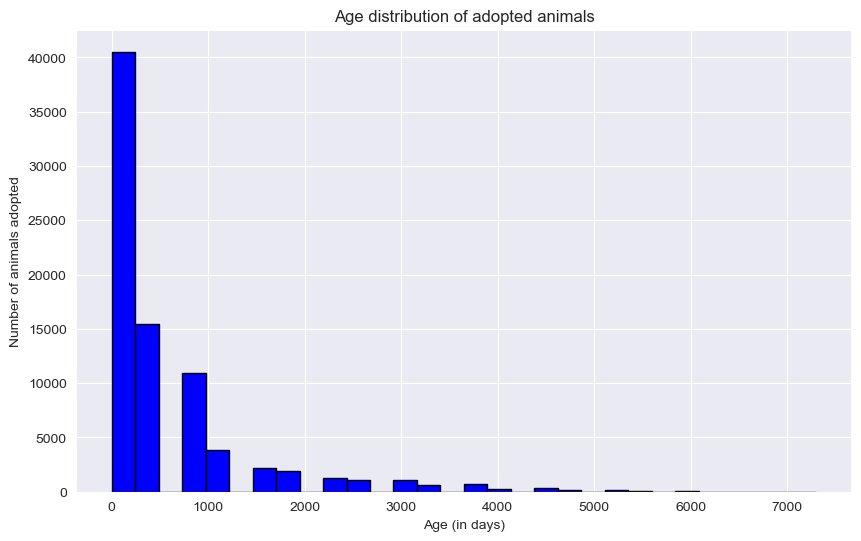

In [39]:
plt.figure(figsize=(10,6))
plt.hist(adopted_data["Age upon Outcome"].dropna(), bins=30, color="blue", edgecolor="black")
plt.title("Age distribution of adopted animals")
plt.xlabel("Age (in days)")
plt.ylabel("Number of animals adopted")
plt.show()

#### This chart shows the distribution of adopted animals by their age (in days).
#### We can observe that the majority of adopted animals are very young, with the largest portion being under 1 year (approximately 0-365 days).
#### As age increases, the number of adopted animals significantly decreases, indicating that younger animals are more likely to be adopted.
#### The gaps in the graph are due to the fact that the data often records ages as full years, such as "2 years" or "5 years," without taking into account months. This causes ages to cluster around whole values, such as "2 years" or "5 years," and intermediate values, such as "2 years and 2 months," to be less common.

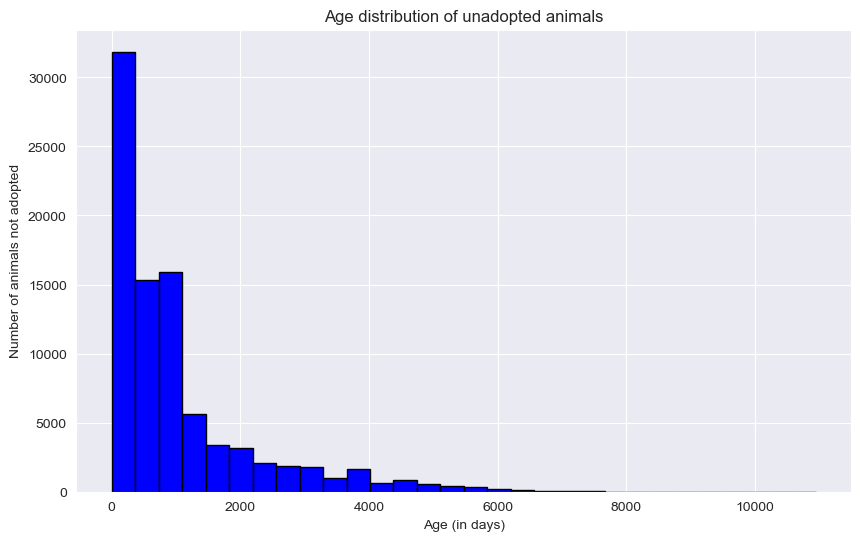

In [40]:
non_adopted_data = outcomes[outcomes["Outcome Type"] != "Adoption"].copy()

plt.figure(figsize=(10,6))
plt.hist(non_adopted_data["Age upon Outcome"].dropna(), bins=30, color="blue", edgecolor="black")
plt.title("Age distribution of unadopted animals")
plt.xlabel("Age (in days)")
plt.ylabel("Number of animals not adopted")
plt.show()

#### So, despite the visual similarity of the graphs, we can still conclude that age plays a role in animal adoption.
#### But it is worth using a more visual way of demonstration.

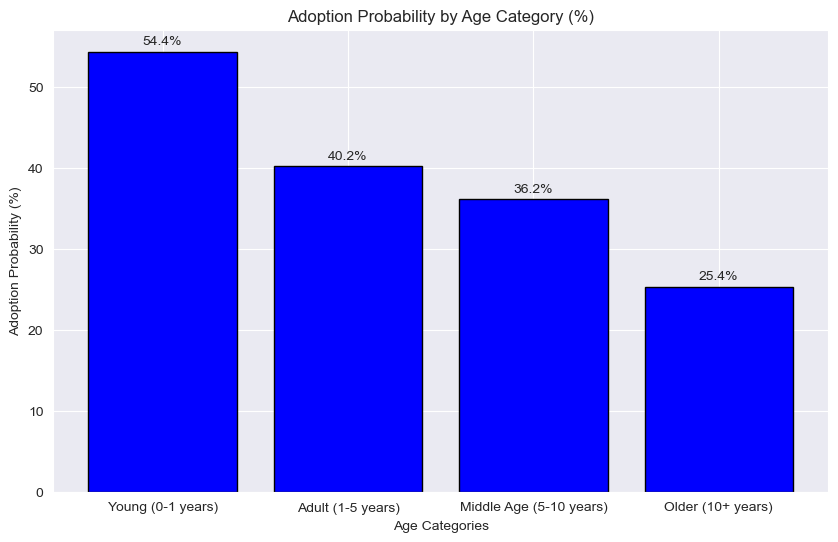

In [41]:
bins = [0, 365, 1825, 3650, 20000]  
labels = ["Young (0-1 years)", "Adult (1-5 years)", "Middle Age (5-10 years)", "Older (10+ years)"]

outcomes["Age Category"] = pd.cut(outcomes["Age upon Outcome"], bins=bins, labels=labels)
total_counts = outcomes["Age Category"].value_counts()

adopted_data = outcomes[outcomes["Outcome Type"] == "Adoption"]
adopted_counts = adopted_data["Age Category"].value_counts()
adoption_probabilities = (adopted_counts / total_counts) * 100
adoption_probs = adoption_probabilities[labels].values

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, adoption_probs, color="blue", edgecolor="black")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha="center", va="bottom") 

plt.title("Adoption Probability by Age Category (%)")
plt.xlabel("Age Categories")
plt.ylabel("Adoption Probability (%)")

plt.show()

#### Adoption probability by age, and this is a more accurate and visual way. It clearly shows that young animals (0-1 year) have a significantly higher chance of being adopted (more than 50%) compared to older animals.
#### "Does the age of an animal affect the likelihood of adoption?" can be answered affirmatively - yes, age affects the likelihood of adoption.
##
#### Is the intake of animals constant throughout the year or are there periods with higher/lower loads?

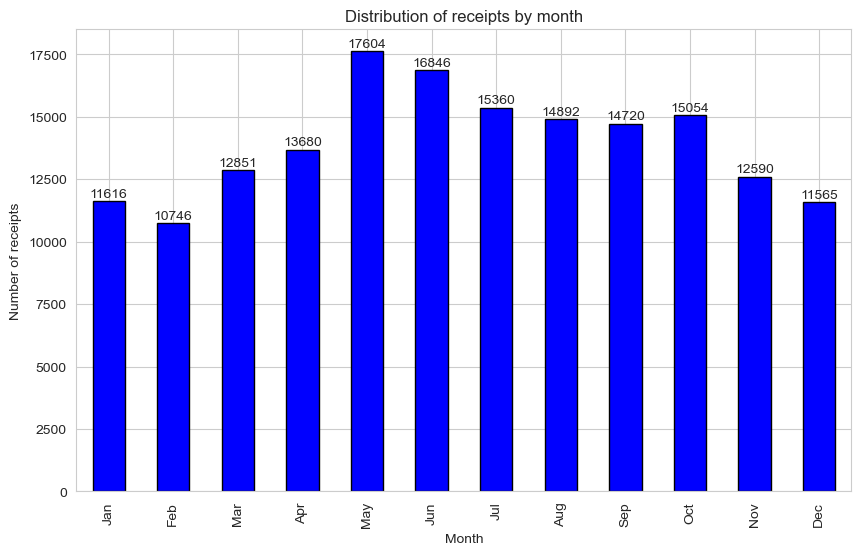

In [42]:
display(fig_month)

#### Based on the graph, it can be concluded that the number of animal arrivals is not constant throughout the year. The highest number of arrivals occurs in the spring and summer (April to July), with a peak in May. This increase can be caused by various factors, such as the breeding season or changes in the conditions of keeping pets. Fewer arrivals occur in the winter months.

#### This information has already been discussed previously, but is presented here with an emphasis on checking the seasonal changes: the spring and summer months show a higher load, while winter shows a decrease in activity in animal arrivals.

##
## ⏹ Own questions
#
### ⏺ What types of animals most often end up in shelters and what is their next journey?

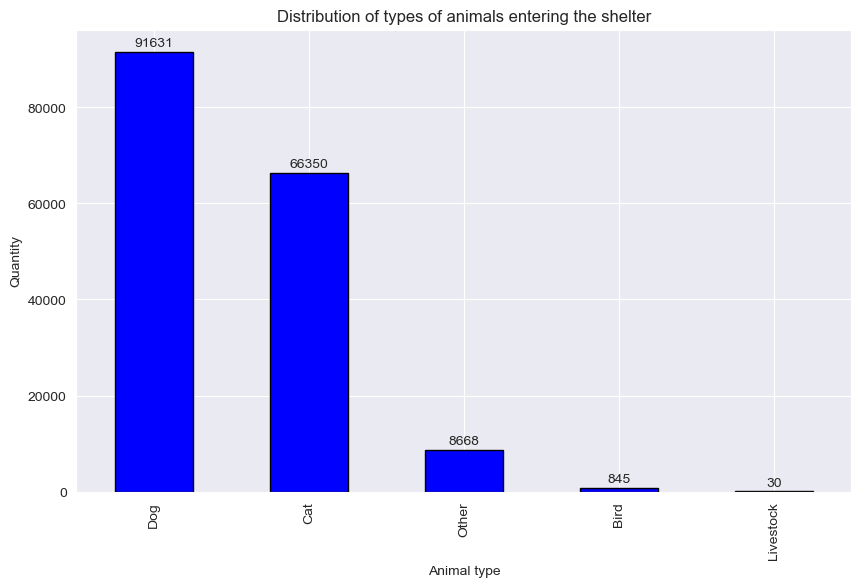

In [43]:
# Let's consider the distribution of animals by types
animal_type_counts = intakes["Animal Type"].value_counts()

plt.figure(figsize=(10,6))
ax = animal_type_counts.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Distribution of types of animals entering the shelter")
plt.xlabel("Animal type")
plt.ylabel("Quantity")

for index, value in enumerate(animal_type_counts):
    ax.text(index, value + 500, f"{value}", ha="center", va="bottom")

plt.show()

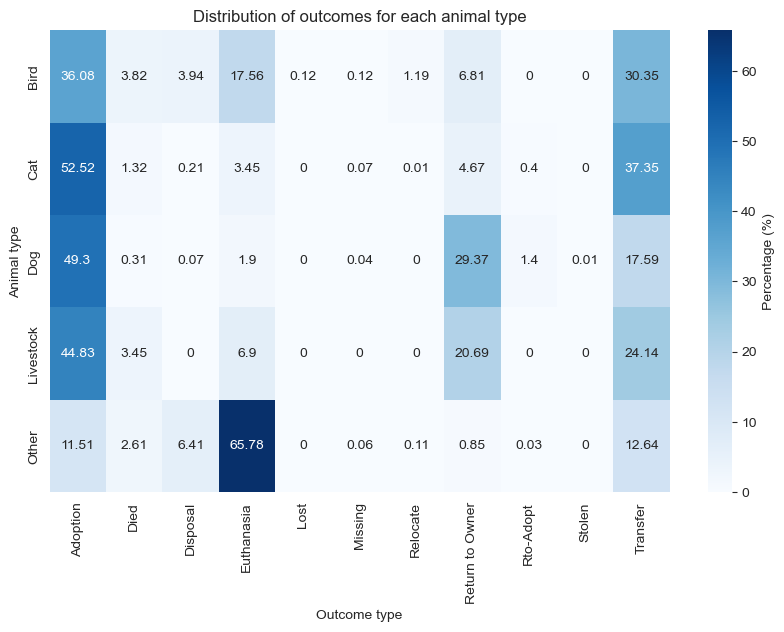

In [44]:
# Let's consider the further path for each type of animal
merged_data = pd.merge(intakes[["Animal ID", "Animal Type"]], outcomes[["Animal ID", "Outcome Type"]], on="Animal ID", how="inner")
outcome_by_animal_type = pd.crosstab(merged_data["Animal Type"], merged_data["Outcome Type"], normalize="index") * 100
outcome_by_animal_type = outcome_by_animal_type.round(2)

plt.figure(figsize=(10,6))
heatmap = sns.heatmap(outcome_by_animal_type, annot=True, cmap="Blues", fmt="g")
plt.title("Distribution of outcomes for each animal type")
plt.xlabel("Outcome type")
plt.ylabel("Animal type")
colorbar = heatmap.collections[0].colorbar
colorbar.set_label("Percentage (%)")
plt.show()

#### Dogs and cats are the most common animals in shelters, with dogs being more likely to be returned to their owners, while other animals, such as "Others" and birds, have lower chances of being adopted or returned to their owners, likely due to their difficulty in keeping them or their lower popularity among people looking to adopt a pet.

##
### ⏺ What colors of animals most often end up in shelters?

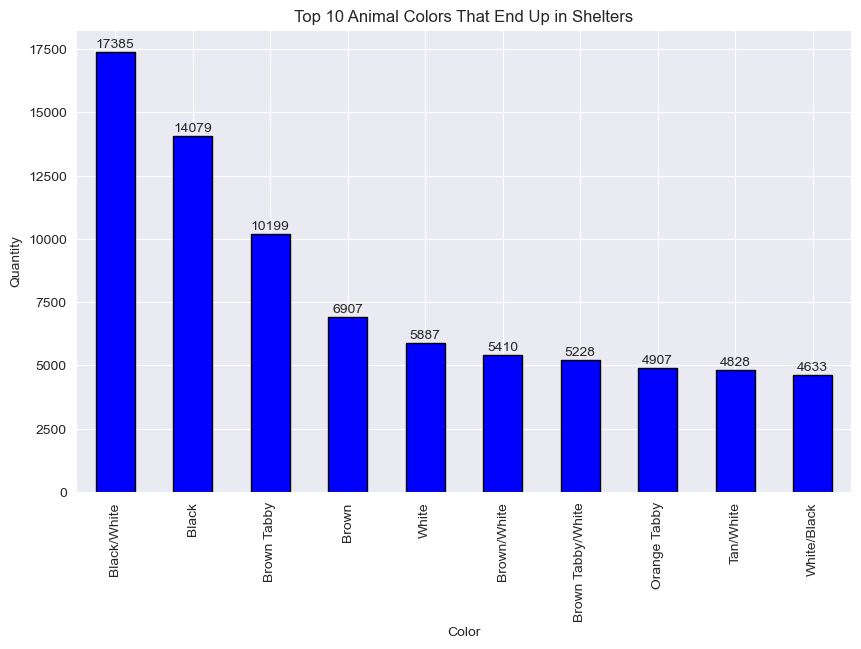

In [45]:
# Distribution by colors
color_counts = intakes["Color"].value_counts().head(10)

plt.figure(figsize=(10,6))
ax = color_counts.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Top 10 Animal Colors That End Up in Shelters")
plt.xlabel("Color")
plt.ylabel("Quantity")

for index, value in enumerate(color_counts):
    ax.text(index, value + 50, f"{value}", ha="center", va="bottom")

plt.show()


#### ⏺ Looking at the graph, we can conclude that the most common colors of animals ending up in shelters are black and white and black, with a significant gap from other colors.

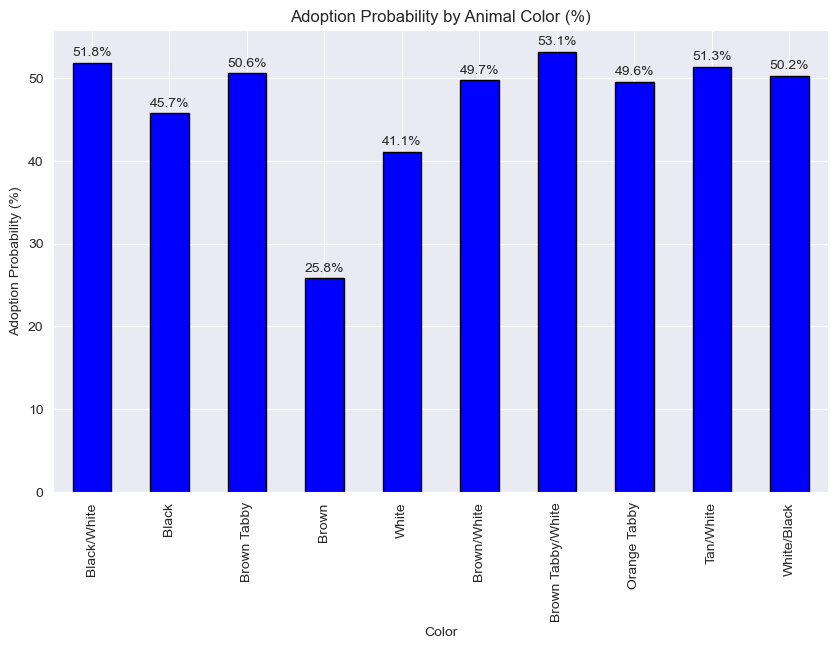

In [46]:
total_color_counts = intakes["Color"].value_counts()
adopted_color_counts = outcomes[outcomes["Outcome Type"] == "Adoption"]["Color"].value_counts()
adoption_probabilities = (adopted_color_counts / total_color_counts) * 100
adoption_probabilities_top10 = adoption_probabilities.loc[color_counts.index].fillna(0)
plt.figure(figsize=(10, 6))
bars = adoption_probabilities_top10.plot(kind="bar", color="blue", edgecolor="black")

for bar in bars.containers[0]:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}%", ha="center", va="bottom") 
    
plt.title("Adoption Probability by Animal Color (%)")
plt.xlabel("Color")
plt.ylabel("Adoption Probability (%)")
plt.show()

In [47]:
adoption_probabilities_top10 = adoption_probabilities.sort_values(ascending=False).head(10)

#### This indicates that while the color of the animal does affect the chance of adoption, in most cases the difference between colors is relatively small (around 10-15%). However, it is worth paying attention to those colors that are significantly behind in the chance of adoption, such as Brown.

##
### ⏺ Does the chance of adoption depend on the gender of the animal?

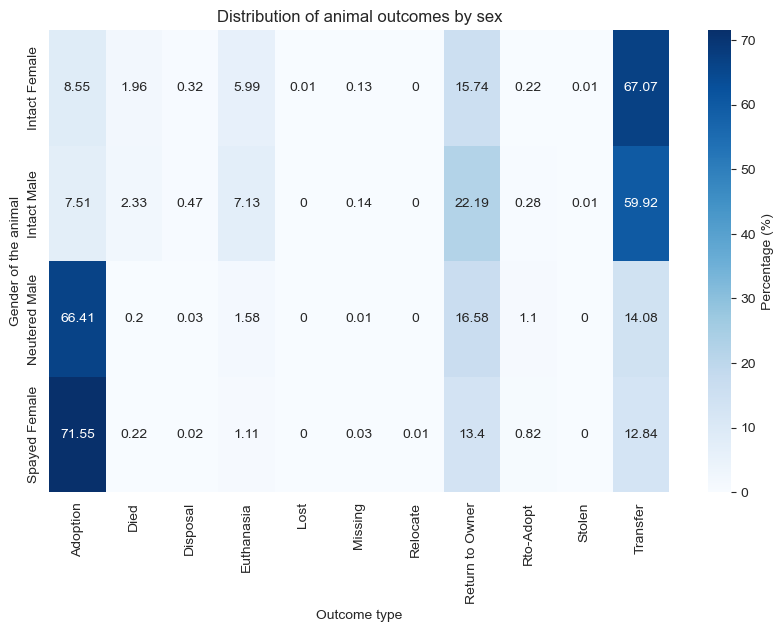

In [48]:
tmp = outcomes.loc[:, ["Sex upon Outcome", "Outcome Type"]].dropna()

merged_data_sex = pd.crosstab(tmp["Sex upon Outcome"], tmp["Outcome Type"], normalize="index") * 100
merged_data_sex = merged_data_sex.round(2)

plt.figure(figsize=(10,6))
heatmap = sns.heatmap(merged_data_sex, annot=True, cmap="Blues", fmt="g")
plt.title("Distribution of animal outcomes by sex")
plt.xlabel("Outcome type")
plt.ylabel("Gender of the animal")
colorbar = heatmap.collections[0].colorbar
colorbar.set_label("Percentage (%)")
plt.show()


#### The sex of the animal itself does not have a significant impact on adoption, but the sterilization status does play a significant role. Neutered animals, regardless of sex, have a higher chance of being adopted.

##
### ⏺ Does the chance of euthanasia depend on the age of the animal?

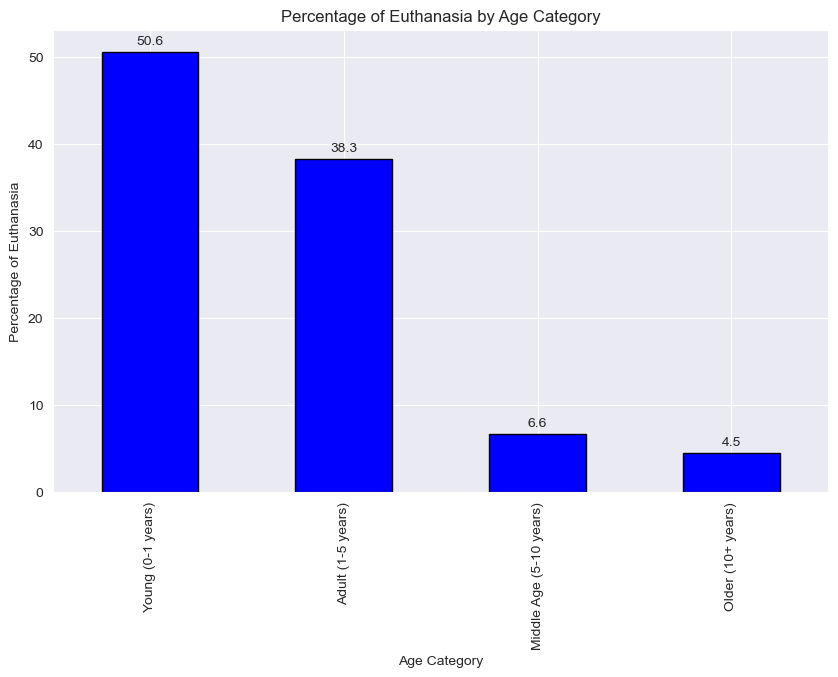

In [49]:
euthanasia_data = outcomes[outcomes["Outcome Type"] == "Euthanasia"]
euthanasia_data.loc[:, "Age Category"] = pd.cut(euthanasia_data["Age upon Outcome"], bins=bins, labels=labels)
euthanasia_by_age = euthanasia_data["Age Category"].value_counts(normalize=True) * 100

plt.figure(figsize=(10,6))
ax = euthanasia_by_age.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Percentage of Euthanasia by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Percentage of Euthanasia")

for index, value in enumerate(euthanasia_by_age):
    ax.text(index, value + 0.5, f"{value:.1f}", ha="center", va="bottom")

plt.show()

#### Euthanasia is more common among young and adult animals, while it is less common among older animals.